# Data-driven SPI: Quick Start Demo

This notebook allows you to run the **Data-driven SPI** reconstruction model directly in your browser.

Key features demonstrated:
1. **Efficient Deployment**: Uses a pruned (50% sparsity) and compressed (3.29x) model.
2. **Fast Inference**: High-speed reconstruction from binary measurements.

Repo: [https://github.com/Xia-Research-Lab/Data-driven-SPI](https://github.com/Xia-Research-Lab/Data-driven-SPI)

In [1]:
# @title 1. Setup Environment
# @markdown Clone the repository and install dependencies.

!git clone https://github.com/Xia-Research-Lab/Data-driven-SPI.git
%cd Data-driven-SPI

# Install specific dependencies not usually in Colab default
!pip install pytorch_ssim torchsummary pytorch-lightning

# Optional: Install exact requirements (uncomment if needed)
# !pip install -r requirements.txt

Cloning into 'Data-driven-SPI'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 45 (delta 2), reused 7 (delta 2), pack-reused 38 (from 1)
Receiving objects: 100% (45/45), 58.99 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/Data-driven-SPI
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.3/857.3 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 52.6 MB/s eta 0:00:00
  Created wheel for pytorch_ssim: filename=pytorch_ssim-0.1-py3-none-any.whl size=2006 sha256=1d8040937c2e33d654a015857fe1a786f760255ab87ceaa983cd2c5e423e2949
  Stored in directory: /root/.cache/pip/wheels/54/a0/11/99f86224e71729ed9ef0c4ffe1b795807ad5f44bde19bc66f9
Successfully built pytorch_ssim


In [2]:
# @title 2. Run Inference
# @markdown Run the optimized inference script using the pre-packaged compressed model (`assets/spi_pruned.pth.gz`) and sample data.

!python inference_after_prune.py \
    --model_path assets/spi_pruned.pth.gz \
    --measurement_file assets/measurements_1.npy \
    --output_dir colab_results/ \
    --benchmark

Inference device: cuda
Loading compressed model from: assets/spi_pruned.pth.gz
Loaded model from: assets/spi_pruned.pth.gz
  Total parameters: 50,865,409
  Non-zero parameters: 25,461,696
  Sparsity: 49.94%
Generated default Hadamard patterns
  Shape: torch.Size([2048, 16384])
PrunedGeneratorInference initialized:
  Image size: 128x128
  Measurements: 2048

Benchmarking inference speed...
  Batch size: 1
  Num runs: 100

Benchmark Results:
  Mean: 6.65 ms
  Std: 1.46 ms
  Min: 5.92 ms
  Max: 10.21 ms
  Throughput: 150.3 FPS
Loaded measurements from: assets/measurements_1.npy
  Shape: (2048,)
  Saved: colab_results/measurements_1_0000_reconstructed.png
Saved visualization: colab_results/measurements_1_reconstructions.png

Inference complete! Results saved to: colab_results/


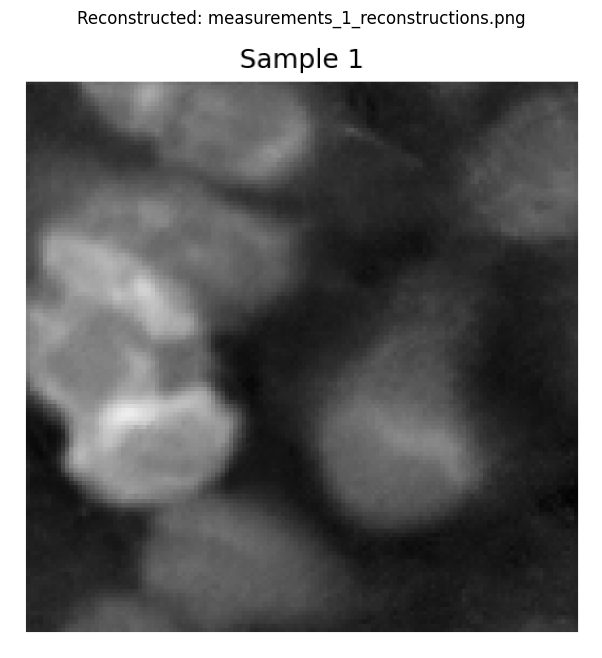

Displaying measurements_1_reconstructions.png


In [5]:
# @title 3. Visualize Result
# @markdown Display the reconstructed image.

import matplotlib.pyplot as plt
from PIL import Image
import os

output_dir = "colab_results"
files = [f for f in os.listdir(output_dir) if f.endswith(".png")]

if files:
    img_path = os.path.join(output_dir, files[0])
    img = Image.open(img_path)

    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap="gray")
    plt.title(f"Reconstructed: {files[0]}")
    plt.axis("off")
    plt.show()

    print(f"Displaying {files[0]}")
else:
    print("No output image found. Please check the inference step.")